# Data Exploration - 2

## Carga de datos
Se realiza carga de datos obtenidos mediante web crawling a pollstar.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from pandas.plotting import lag_plot
import numpy  as np

In [2]:
filename = "/home/bberrios/experimento-1/filtrar/live_boxoffice-all-4.txt"
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
events = pd.read_csv(filename, sep='\t', parse_dates=['StartPlayDate'], date_parser=dateparse)
events.head()

,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows
0,2018-05-16,DJAMILA,Djamila,Stadsschouwburg,"Antwerp, Belgium",512,1912,27,17.0,88.0,20235,Euro,16724,1
1,2018-05-15,LUIS MIGUEL,Luis Miguel,Auditorio Nacional,"Mexico City, Mexico",28860,9620,100,290.0,4990.0,2549264,Pesos,47667615,3
2,2018-05-13,AMBROSIA,Ambrosia,Coeur d'Alene Casino,"Worley, ID",527,1800,30,20.0,25.0,10385,US DOLLAR,10385,1
3,2018-05-12,ANGUS JULIA STONE,Angus & Julia Stone,Hordern Pavilion,"Moore Park, Australia",5421,5421,100,89.9,0.0,321373,Australian,425772,1
4,2018-05-11,3TEETH,3Teeth,Rebellion Bar,"Manchester, United Kingdom",166,450,37,10.0,12.5,2301,UK Pounds,1672,1


## Influye el día del evento en el éxito de un artista

### Enero 2018

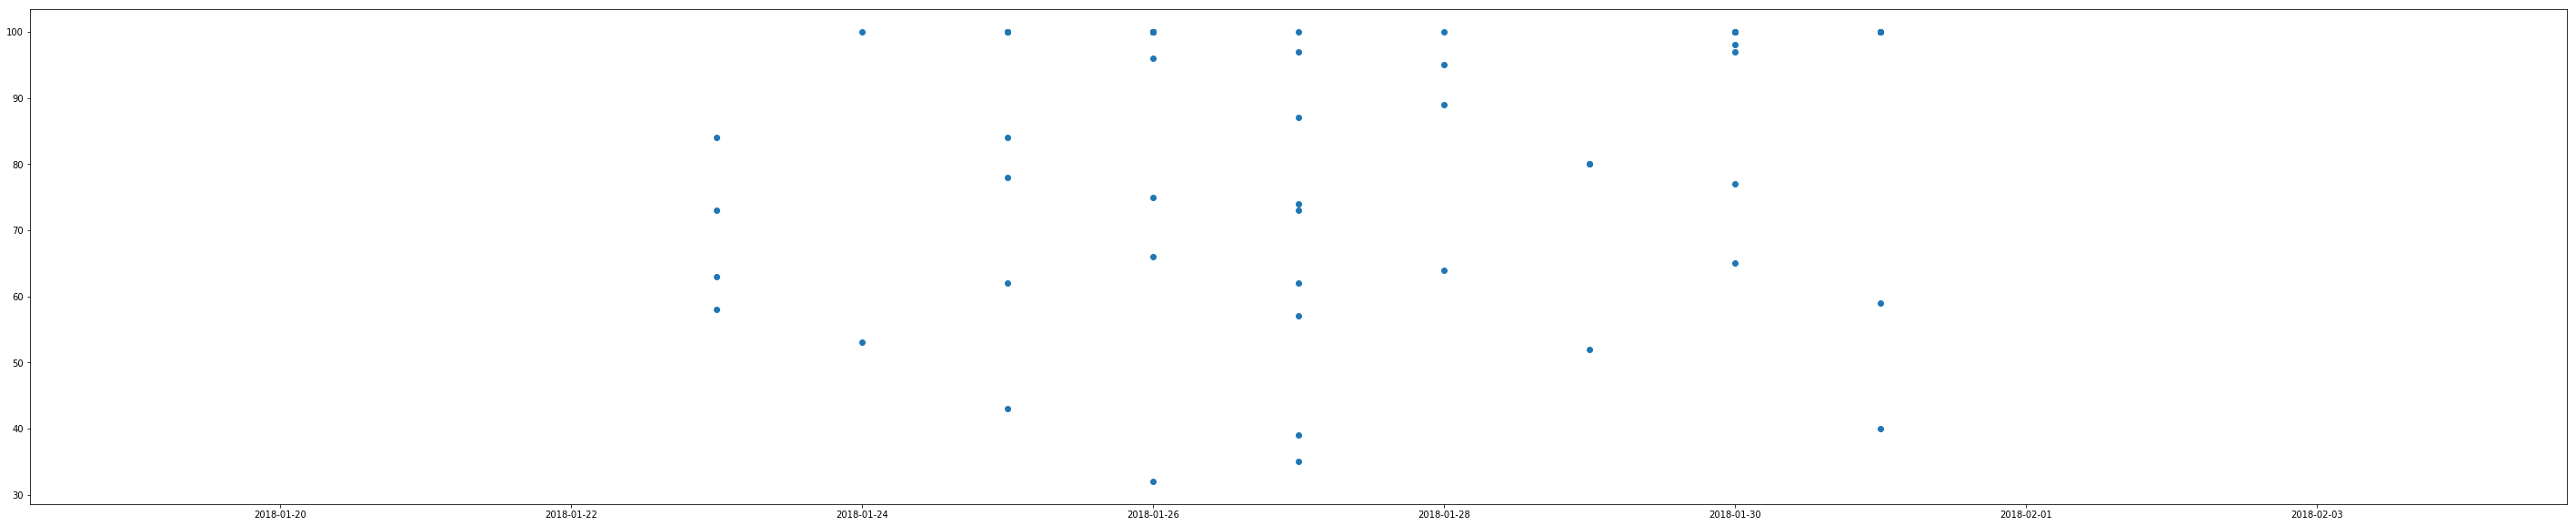

In [63]:
january = events[ 
    (events.StartPlayDate >= '2018-01-01') & (events.StartPlayDate <= '2018-01-31')]

plt.figure(figsize=(50, 10))
plt.scatter(january['StartPlayDate'].tolist(), january['capacityPercentage'])

Buscando algun dia donde hayan habido solo éxitos 
(mínima venta del día supera el 80%) : **Sin hallazgos**

In [64]:
grouping_january = january.groupby('StartPlayDate', as_index = False)
df = grouping_january['capacityPercentage'].agg(['min', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['min'], ascending = [0]).head()

,StartPlayDate,min,count
7,2018-01-30,65,7
5,2018-01-28,64,4
0,2018-01-23,58,4
1,2018-01-24,53,2
6,2018-01-29,52,3


Buscando algun dia donde hayan habido solo fracasos (
máxima venta del día no supera el 60%): **Sin hallazgos**

In [65]:
grouping_january = january.groupby('StartPlayDate', as_index = False)
df = grouping_january['capacityPercentage'].agg(['max', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['max'], ascending = [1]).head()

,StartPlayDate,max,count
6,2018-01-29,80,3
0,2018-01-23,84,4
1,2018-01-24,100,2
2,2018-01-25,100,7
3,2018-01-26,100,10


### Febrero 2018

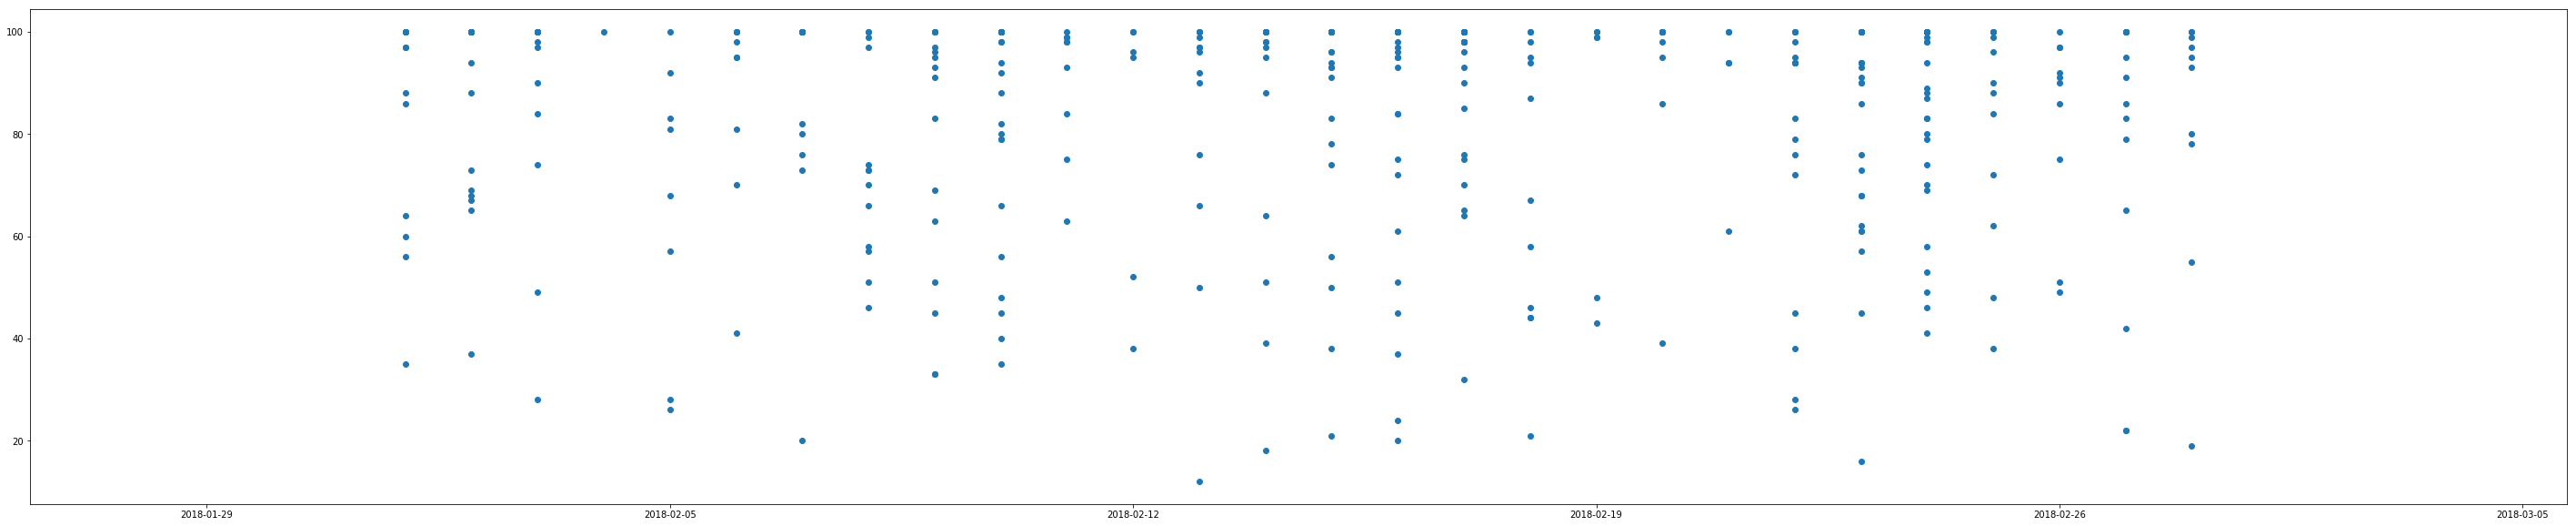

In [66]:
february = events[ 
    (events.StartPlayDate >= '2018-02-01') & (events.StartPlayDate <= '2018-02-28')]

plt.figure(figsize=(50, 10))
plt.scatter(february['StartPlayDate'].tolist(), february['capacityPercentage'])

Buscando algun dia donde hayan habido solo éxitos 
(mínima venta del día supera el 80%) :

**domingo 4 de febrero solo éxitos**: Solo 1 evento en el día

In [67]:
grouping_february = february.groupby('StartPlayDate', as_index = False)
df = grouping_february['capacityPercentage'].agg(['min', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['min'], ascending = [0]).head()

,StartPlayDate,min,count
3,2018-02-04,100,1
10,2018-02-11,63,9
20,2018-02-21,61,5
25,2018-02-26,49,10
7,2018-02-08,46,13


Buscando algun dia donde hayan habido solo fracasos (
máxima venta del día no supera el 60%): **Sin hallazgos**

In [68]:
grouping_february = february.groupby('StartPlayDate', as_index = False)
df = grouping_february['capacityPercentage'].agg(['max', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['max'], ascending = [1]).head()

,StartPlayDate,max,count
0,2018-02-01,100,12
25,2018-02-26,100,10
24,2018-02-25,100,12
23,2018-02-24,100,26
22,2018-02-23,100,24


### Marzo 2010

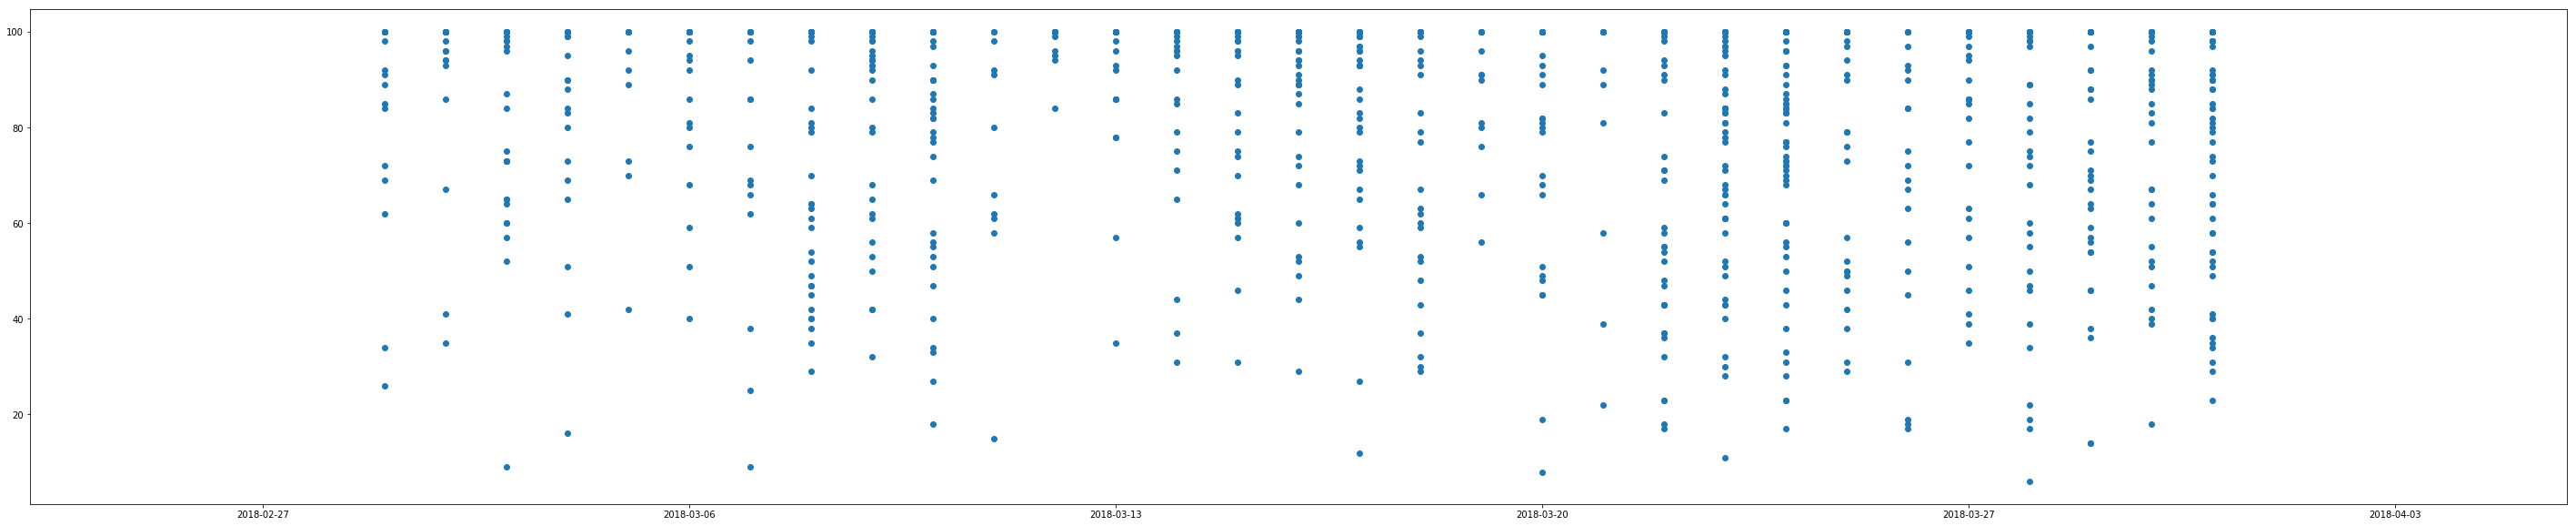

In [69]:
march = events[ 
    (events.StartPlayDate >= '2018-03-01') & (events.StartPlayDate <= '2018-03-31')]

plt.figure(figsize=(50, 10))
plt.scatter(march['StartPlayDate'].tolist(), march['capacityPercentage'])

Buscando algun dia donde hayan habido solo éxitos 
(mínima venta del día supera el 80%) : 

**lunes 12 de marzo solo éxitos, 12 eventos **

In [70]:
grouping_march = march.groupby('StartPlayDate', as_index = False)
df = grouping_march['capacityPercentage'].agg(['min', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['min'], ascending = [0]).head()

,StartPlayDate,min,count
11,2018-03-12,84,12
18,2018-03-19,56,13
4,2018-03-05,42,10
5,2018-03-06,40,20
26,2018-03-27,35,30


Buscando algun dia donde hayan habido solo fracasos (
máxima venta del día no supera el 60%): **Sin hallazgos**

In [71]:
grouping_march = march.groupby('StartPlayDate', as_index = False)
df = grouping_march['capacityPercentage'].agg(['max', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['max'], ascending = [1]).head()

,StartPlayDate,max,count
0,2018-03-01,100,15
28,2018-03-29,100,35
27,2018-03-28,100,42
26,2018-03-27,100,30
25,2018-03-26,100,21


### Abril 2018

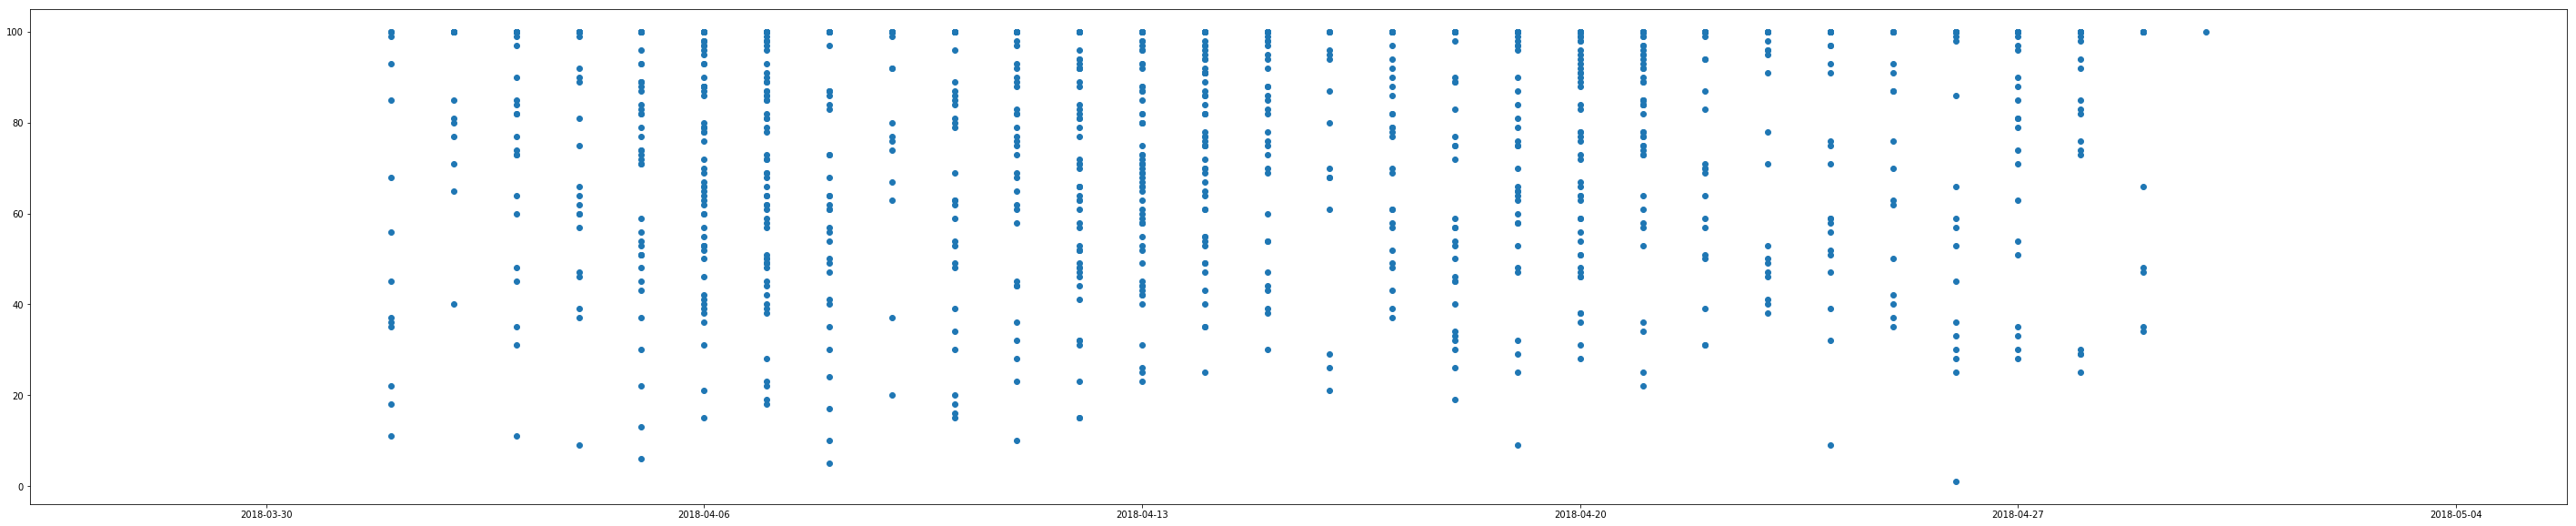

In [72]:
april = events[ 
    (events.StartPlayDate >= '2018-04-01') & (events.StartPlayDate <= '2018-04-30')]

plt.figure(figsize=(50, 10))
plt.scatter(april['StartPlayDate'].tolist(), april['capacityPercentage'])

Buscando algun dia donde hayan habido solo éxitos 
(mínima venta del día supera el 80%) : 


**lunes 30 de abril solo éxitos, 1 evento **

In [73]:
grouping_april = april.groupby('StartPlayDate', as_index = False)
df = grouping_april['capacityPercentage'].agg(['min', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['min'], ascending = [0]).head()

,StartPlayDate,min,count
29,2018-04-30,100,1
1,2018-04-02,40,17
22,2018-04-23,38,21
16,2018-04-17,37,39
24,2018-04-25,35,18


Buscando algun dia donde hayan habido solo fracasos (
máxima venta del día no supera el 60%): **Sin hallazgos**

In [74]:
grouping_april = april.groupby('StartPlayDate', as_index = False)
df = grouping_april['capacityPercentage'].agg(['max', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['max'], ascending = [1]).head()

,StartPlayDate,max,count
0,2018-04-01,100,15
27,2018-04-28,100,29
26,2018-04-27,100,30
25,2018-04-26,100,22
24,2018-04-25,100,18


### Mayo 2018

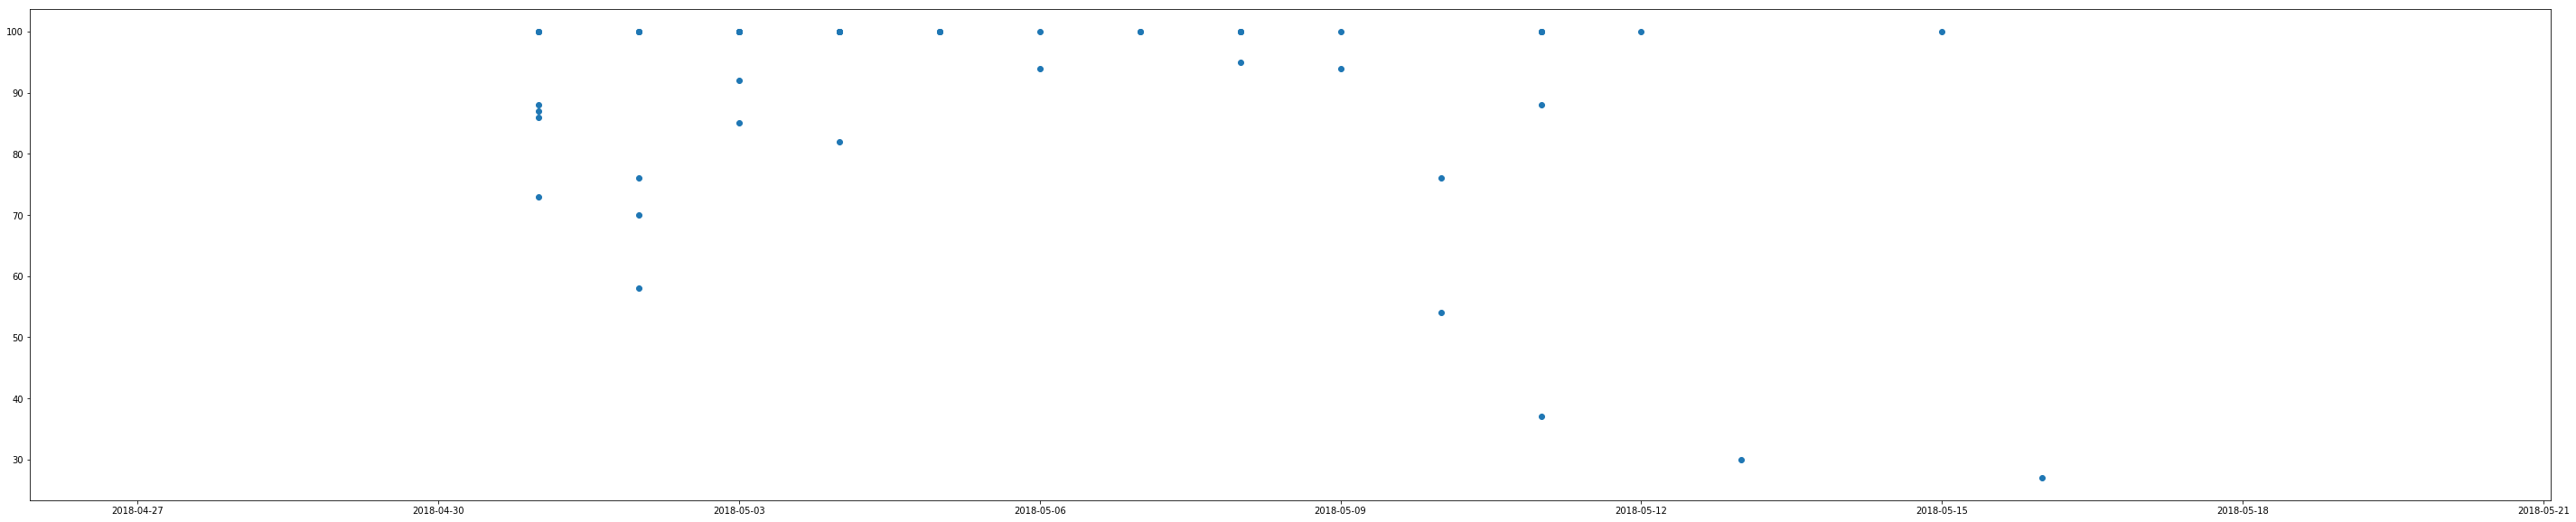

In [75]:
may = events[ 
    (events.StartPlayDate >= '2018-05-01') & (events.StartPlayDate <= '2018-05-31')]

plt.figure(figsize=(50, 10))
plt.scatter(may['StartPlayDate'].tolist(), may['capacityPercentage'])

Buscando algun dia donde hayan habido solo éxitos 
(mínima venta del día supera el 80%) : 


**jueves 3 de mayo solo éxitos, 7 eventos **

**viernes 4 de mayo solo éxitos, 6 eventos **

**sabado 5 de mayo solo éxitos, 3 eventos **

**domingo 6 de mayo solo éxitos, 2 eventos **

**lunes 7 de mayo solo éxitos, 2 eventos **

**martes 8 de mayo solo éxitos, 4 eventos **

**miercoles 9 de mayo solo éxitos, 2 eventos **

**sabado 12 de mayo solo éxitos, 1 evento **

**martes 15 de mayo solo éxitos, 1 evento **

In [78]:
grouping_may = may.groupby('StartPlayDate', as_index = False)
df = grouping_may['capacityPercentage'].agg(['min', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['min'], ascending = [0])[:10]

,StartPlayDate,min,count
4,2018-05-05,100,3
6,2018-05-07,100,2
11,2018-05-12,100,1
13,2018-05-15,100,1
7,2018-05-08,95,4
5,2018-05-06,94,2
8,2018-05-09,94,2
2,2018-05-03,85,7
3,2018-05-04,82,6
0,2018-05-01,73,7


Buscando algun dia donde hayan habido solo fracasos (
máxima venta del día no supera el 60%): 

**domingo 13 de mayo solo fracasos, 1 evento **

**miercoles 16 de mayo solo fracasos, 1 evento **

In [77]:
grouping_may = may.groupby('StartPlayDate', as_index = False)
df = grouping_may['capacityPercentage'].agg(['max', 'count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['max'], ascending = [1]).head()

,StartPlayDate,max,count
14,2018-05-16,27,1
12,2018-05-13,30,1
9,2018-05-10,76,2
0,2018-05-01,100,7
1,2018-05-02,100,6


Para el mes de **mayo** las ticketeras no han liberado todos los resultados de venta, esto podría **explicar** el por qué de estos resultados.